In [66]:
import pandas as pd
from scipy import stats

#data from survey
data = {
    "Age Group": ["30 - 39", "40 - 49", "30 - 39", "30 - 39", "18 - 29", "18 - 29", "30 - 39", "30 - 39", "30 - 39", "18 - 29", "30 - 39", "18 - 29", "18 - 29", "30 - 39", "18 - 29", "18 - 29", "18 - 29", "30 - 39", "18 - 29", "40 - 49", "18 - 29", "30 - 39", "18 - 29", "18 - 29", "18 - 29", "18 - 29"],
    "Years of Professional Experience": ["More than 10 years", "More than 10 years", "4-7 years", "4-7 years", "More than 10 years", "4-7 years", "More than 10 years", "1-3 years", "1-3 years", "1-3 years", "4-7 years", "4-7 years", "1-3 years", "4-7 years", "1-3 years", "Less than 1 year", "4-7 years", "8-10 years", "1-3 years", "More than 10 years", "4-7 years", "8-10 years", "1-3 years", "None", "Less than 1 year", "More than 10 years"],
    "Familiarity with STEM History": ["Somewhat familiar", "Very familiar", "Moderately familiar", "Somewhat familiar", "Somewhat familiar", "Somewhat familiar", "Somewhat familiar", "Moderately familiar", "Moderately familiar", "Somewhat familiar", "Somewhat familiar", "Not familiar", "Somewhat familiar", "Moderately familiar", "Not familiar", "Not familiar", "Not familiar", "Not familiar", "Not familiar", "Somewhat familiar", "Not familiar", "Moderately familiar", "Moderately familiar", "Somewhat familiar", "Somewhat familiar", "Moderately familiar"],
    "Importance of Historical Context": ["Important", "Important", "Important", "Moderately Important", "Not Important", "Slightly Important", "Moderately Important", "Slightly Important", "Moderately Important", "Slightly Important", "Important", "Slightly Important", "Slightly Important", "Slightly Important", "Moderately Important", "Not Important", "Important", "Slightly Important", "Slightly Important", "Important", "Not Important", "Very Important.", "Important", "Slightly Important", "Not Important", "Important"],
}
df = pd.DataFrame(data)
importance_mapping = {
    "Not Important": 1,
    "Slightly Important": 2,
    "Moderately Important": 3,
    "Important": 4,
    "Very Important.": 5
}
df["Importance of Historical Context"] = df["Importance of Historical Context"].map(importance_mapping)

#Descriptive Statistics
descriptive_stats = df["Importance of Historical Context"].describe()
mode = df["Importance of Historical Context"].mode().tolist()

#Percentages for categorical data
age_group_percentages = df["Age Group"].value_counts(normalize=True) * 100
professional_experience_percentages = df["Years of Professional Experience"].value_counts(normalize=True) * 100
familiarity_with_stem_history_percentages = df["Familiarity with STEM History"].value_counts(normalize=True) * 100
descriptive_stats, mode, age_group_percentages, professional_experience_percentages, familiarity_with_stem_history_percentages


(count    26.000000
 mean      2.730769
 std       1.185165
 min       1.000000
 25%       2.000000
 50%       2.500000
 75%       4.000000
 max       5.000000
 Name: Importance of Historical Context, dtype: float64,
 [2],
 Age Group
 18 - 29    53.846154
 30 - 39    38.461538
 40 - 49     7.692308
 Name: proportion, dtype: float64,
 Years of Professional Experience
 4-7 years             30.769231
 1-3 years             26.923077
 More than 10 years    23.076923
 Less than 1 year       7.692308
 8-10 years             7.692308
 None                   3.846154
 Name: proportion, dtype: float64,
 Familiarity with STEM History
 Somewhat familiar      42.307692
 Moderately familiar    26.923077
 Not familiar           26.923077
 Very familiar           3.846154
 Name: proportion, dtype: float64)

In [67]:
#Cross-tabulation
cross_tab = pd.crosstab(index=df["Years of Professional Experience"], columns=df["Importance of Historical Context"], normalize='index') * 100
cross_tab.columns = ["Not Important", "Slightly Important", "Moderately Important", "Important", "Very Important"]
cross_tab


,Not Important,Slightly Important,Moderately Important,Important,Very Important
Years of Professional Experience,,,,,
1-3 years,0.000000,57.142857,28.571429,14.285714,0.0
4-7 years,12.500000,37.500000,12.500000,37.500000,0.0
8-10 years,0.000000,50.000000,0.000000,0.000000,50.0
Less than 1 year,100.000000,0.000000,0.000000,0.000000,0.0
More than 10 years,16.666667,0.000000,16.666667,66.666667,0.0
None,0.000000,100.000000,0.000000,0.000000,0.0


In [68]:
#Age vs. Importance
age_group_importance_mean = df.groupby("Age Group")["Importance of Historical Context"].mean()

#Years vs. Importance
professional_experience_importance_mean = df.groupby("Years of Professional Experience")["Importance of Historical Context"].mean()
age_group_importance_mean, professional_experience_importance_mean

(Age Group
 18 - 29    2.214286
 30 - 39    3.200000
 40 - 49    4.000000
 Name: Importance of Historical Context, dtype: float64,
 Years of Professional Experience
 1-3 years             2.571429
 4-7 years             2.750000
 8-10 years            3.500000
 Less than 1 year      1.000000
 More than 10 years    3.333333
 None                  2.000000
 Name: Importance of Historical Context, dtype: float64)

In [69]:
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

responses = ["Storytelling enhances learning through engagement.", "Historical figures like Tesla inspire innovation.", "..."]
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

processed_responses = [preprocess(response) for response in responses]

#Flatten
all_words = [word for response in processed_responses for word in response]

#most common words
word_counts = Counter(all_words)
common_words = word_counts.most_common(10)
print(common_words)


[('storytelling', 1), ('enhances', 1), ('learning', 1), ('engagement', 1), ('historical', 1), ('figures', 1), ('like', 1), ('tesla', 1), ('inspire', 1), ('innovation', 1)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


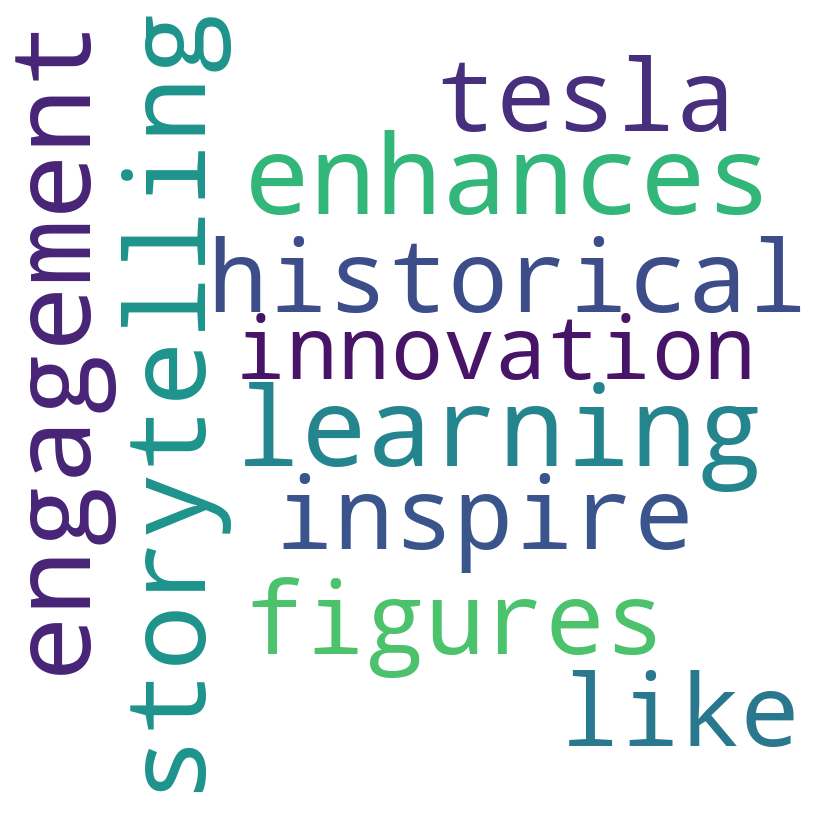

In [70]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ['storytelling', 'enhances', 'learning', 'engagement', 'historical', 'figures', 'like', 'tesla', 'inspire', 'innovation']  # Extend this list based on your actual data

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(" ".join(all_words))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [71]:
import pandas as pd
from scipy.stats import chi2_contingency, kruskal

data = {
    "Age Group": ["30 - 39", "40 - 49", "30 - 39", "18 - 29"],
    "Effectiveness of Storytelling": [1, 1, 1, 0],
    "Years of Professional Experience": ["More than 10 years", "4-7 years", "1-3 years", "Less than 1 year"],
    "Importance of Historical Context": [4, 3, 2, 1]
}
df = pd.DataFrame(data)

#Chi-Square Test
contingency_table = pd.crosstab(df["Age Group"], df["Effectiveness of Storytelling"])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test")
print("Chi2 Stat:", chi2_stat, "P-value:", p_value)

#Kruskal-Wallis Test
experience_mapping = {
    "Less than 1 year": 1,
    "1-3 years": 2,
    "4-7 years": 3,
    "8-10 years": 4,
    "More than 10 years": 5
}
df["Experience Group"] = df["Years of Professional Experience"].map(experience_mapping)
groups = df.groupby("Experience Group")["Importance of Historical Context"].apply(list)
kruskal_stat, kruskal_p = kruskal(*groups)
print("\nKruskal-Wallis Test")
print("H Statistic:", kruskal_stat, "P-value:", kruskal_p)


Chi-Square Test
Chi2 Stat: 4.0 P-value: 0.1353352832366127

Kruskal-Wallis Test
H Statistic: 3.0 P-value: 0.3916251762710877


Demographic Table:
  Age Group  Count
0   18 - 29     14
1   30 - 39     10
2   40 - 49      2


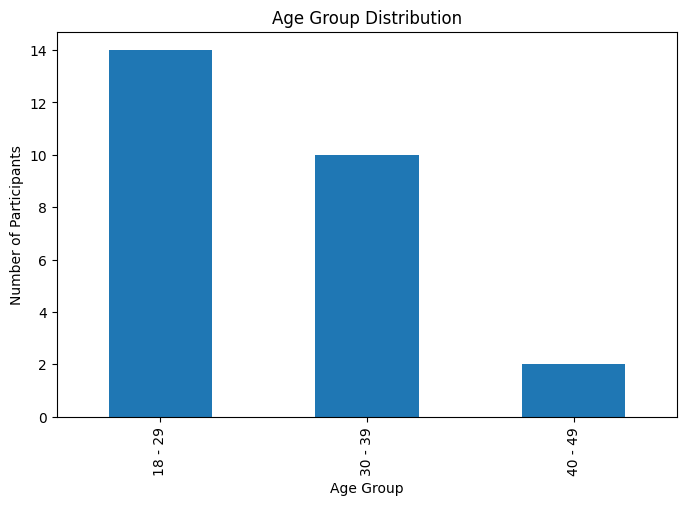

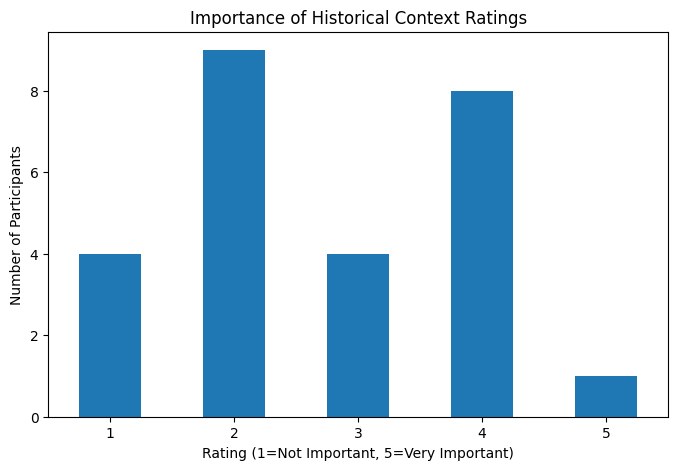

<Figure size 640x480 with 0 Axes>

In [72]:
data = {
    "Age Group": ["30 - 39", "40 - 49", "30 - 39", "30 - 39", "18 - 29", "18 - 29", "30 - 39", "30 - 39", "30 - 39", "18 - 29", "30 - 39", "18 - 29", "18 - 29", "30 - 39", "18 - 29", "18 - 29", "18 - 29", "30 - 39", "18 - 29", "40 - 49", "18 - 29", "30 - 39", "18 - 29", "18 - 29", "18 - 29", "18 - 29"],
    "Years of Professional Experience": ["More than 10 years", "More than 10 years", "4-7 years", "4-7 years", "More than 10 years", "4-7 years", "More than 10 years", "1-3 years", "1-3 years", "1-3 years", "4-7 years", "4-7 years", "1-3 years", "4-7 years", "1-3 years", "Less than 1 year", "4-7 years", "8-10 years", "1-3 years", "More than 10 years", "4-7 years", "8-10 years", "1-3 years", "None", "Less than 1 year", "More than 10 years"],
    "Familiarity with STEM History": ["Somewhat familiar", "Very familiar", "Moderately familiar", "Somewhat familiar", "Somewhat familiar", "Somewhat familiar", "Somewhat familiar", "Moderately familiar", "Moderately familiar", "Somewhat familiar", "Somewhat familiar", "Not familiar", "Somewhat familiar", "Moderately familiar", "Not familiar", "Not familiar", "Not familiar", "Not familiar", "Not familiar", "Somewhat familiar", "Not familiar", "Moderately familiar", "Moderately familiar", "Somewhat familiar", "Somewhat familiar", "Moderately familiar"],
    "Importance of Historical Context": ["Important", "Important", "Important", "Moderately Important", "Not Important", "Slightly Important", "Moderately Important", "Slightly Important", "Moderately Important", "Slightly Important", "Important", "Slightly Important", "Slightly Important", "Slightly Important", "Moderately Important", "Not Important", "Important", "Slightly Important", "Slightly Important", "Important", "Not Important", "Very Important.", "Important", "Slightly Important", "Not Important", "Important"],
}
df = pd.DataFrame(data)

importance_mapping = {
    "Not Important": 1,
    "Slightly Important": 2,
    "Moderately Important": 3,
    "Important": 4,
    "Very Important.": 5
}

df["Importance of Historical Context"] = df["Importance of Historical Context"].map(importance_mapping)
demographic_table = df.groupby("Age Group").size().reset_index(name='Count')
print("Demographic Table:")
print(demographic_table)

plt.figure(figsize=(8, 5))
df["Age Group"].value_counts().plot(kind="bar")
plt.title("Age Group Distribution")
plt.ylabel("Number of Participants")
plt.xlabel("Age Group")
plt.show()

plt.figure(figsize=(8, 5))
df["Importance of Historical Context"].value_counts().sort_index().plot(kind="bar")
plt.title("Importance of Historical Context Ratings")
plt.ylabel("Number of Participants")
plt.xlabel("Rating (1=Not Important, 5=Very Important)")
plt.xticks(rotation=0)
plt.show()

plt.tight_layout()
plt.show()


Survey Questions
Impact of Storytelling and Historical Context in STEM Education
This survey is part of a cutting-edge research initiative within the Educational Technology that seeks to explore the transformative power of storytelling and its symbiosis with historical context in enhancing STEM (Science, Technology, Engineering, and Mathematics) education. We are eager to uncover how these elements can enrich the learning experience, boost engagement, and deepen understanding of complex STEM concepts. Your insights are invaluable as we strive to integrate an often untapped reservoir of history and narrative into modern STEM curricula. Participation is straightforward and confidential, requiring only a few minutes to complete. Every voice matters in this quest to bridge narratives with knowledge and create an impactful learning journey.

Select your age:
Under 18
18 - 29
30 - 39
40 - 49
50 - 64
65+

How many years of professional experience do you have in the STEM sector?
None
Less than 1 year
1-3 years
4-7 years
8-10 years
More than 10 years

How many years of academic experience do you have in STEM education (including university studies)?
None
Less than 1 year
1-3 years
4-7 years
8-10 years
More than 10 years

How familiar are you with historical milestones and figures in STEM?
Not familiar
Somewhat familiar
Moderately familiar
Very familiar
Extremely familiar
How often do you encounter STEM education content that includes historical contexts or storytelling?
Never
Rarely
Sometimes
Often
Always

In your opinion, how important is it to include historical context in STEM education?
Not Important
Slightly Important
Moderately Important
Important
Very Important.

Can you name any historical figure or event in STEM that particularly interests or inspires you?
Short answer text

Do you believe that incorporating storytelling and history into STEM subjects can enhance learning engagement?
Yes
No

Please explain why you think storytelling and history can or cannot enhance learning engagement in STEM
Short answer text

Have you used any educational tools or resources that integrate STEM history or storytelling?
Yes
No

If yes, which one? Please describe your experience using it.
Short answer text

In your experience, does learning about the history of STEM subjects help in understanding the concepts better?
Yes
No

How likely are you to seek out more information about STEM history after this survey/tool experience?
Very Likely
Likely
Somewhat likely
Unlikely
Very Unlikely

Do you think that integrating storytelling and history into STEM education could have a long-term impact on students' interest in STEM fields?
Yes
No

Please share any additional thoughts on how storytelling and historical context could be effectively integrated into STEM education.


http://peersurvey.cc.*****************.edu/platform/survey-responses.html?id=d333170466ee47ff91b7e3ecf8dbeca7

#survey responses
##csv format
response,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
1,30 - 39,More than 10 years,More than 10 years,Somewhat familiar,Rarely,Important,"Martin Chalfie, discovery of GFP",Yes,"The neuroscience is pretty clear, storytelling enhances learning. ",No,,No,Unlikely,Yes,"Story telling doesn't need to be about historical figures. Rather it just needs to be a story to learn from, it can be about anything as long as it is engaging. "
2,40 - 49,More than 10 years,More than 10 years,Very familiar,Rarely,Important,Maxwell. Because I'm EE,Yes,"It can help. We can see how they furthered the field, and use that to inspire us.",No,I have not.,Yes,Likely,Yes,You ask a very interesting question. I can bet older students (25+) are probably more interested in historical figures.
3,30 - 39,4-7 years,More than 10 years,Moderately familiar,Sometimes,Important,The discovery of Hailey's Comet's periodicity.,Yes,"Storytelling and history provides context for the learning, which can increase student engagement since it gives them an answer as to *why* they should care about the material.",Yes,Kurzgesagt Youtube channel. It provides a narrative and interesting visuals to accompany the learning of a specific concept.,Yes,Somewhat likely,Yes,
4,30 - 39,4-7 years,More than 10 years,Somewhat familiar,Often,Moderately Important,The proposal of Generative Grammar and studies in this area,Yes,"It is vivid and refreshing, providing a different perspective of information and textual and imagery imprints that last",No,,Yes,Somewhat likely,Yes,
5,18 - 29,More than 10 years,Less than 1 year,Somewhat familiar,Rarely,Not Important,There are many exciting and inspiring people and events in the history of STEM fields. One figure that particularly interests me is Nikola Tesla. Tesla was a Serbian-American inventor and engineer whose contributions to electricity and electromagnetism profoundly influenced modern science and technology.,Yes,Stories can strengthen the background and arouse students’ interest,No,,Yes,Likely,Yes,
6,18 - 29,4-7 years,4-7 years,Somewhat familiar,Rarely,Slightly Important,Alan Turing,Yes,"Makes it more interesting, humanizes it",No,,Yes,Somewhat likely,Yes,I think including books and audiobooks to listen along or read to in the class would be great
7,30 - 39,More than 10 years,8-10 years,Somewhat familiar,Sometimes,Moderately Important,Ada Lovelace,Yes,It helps connect to real people and anecdotes,No,,Yes,Somewhat likely,Yes,
8,30 - 39,1-3 years,1-3 years,Moderately familiar,Never,Slightly Important,Elon Musk,No,dont think it helps ,No,,No,Somewhat likely,No,
9,30 - 39,1-3 years,Less than 1 year,Moderately familiar,Rarely,Moderately Important,None,Yes,Why wouldn't it? ,No,,No,Somewhat likely,Yes,
10,18 - 29,1-3 years,1-3 years,Somewhat familiar,Rarely,Slightly Important,N/A,Yes,N/A,No,,No,Likely,Yes,
11,30 - 39,4-7 years,4-7 years,Somewhat familiar,Rarely,Important,"Alan Turing, Nikola Tesla, Isaac Newton",Yes,Helps to provide contextual details around decisions made and inventions created,No,,Yes,Likely,Yes,
12,18 - 29,4-7 years,4-7 years,Not familiar,Rarely,Slightly Important,"Its crazy how much of the current deep learning advances, are really driven be research from 50 years ago that only became feasible recently do to incrases in computing power",Yes,I think giving the context of where ideas came from can help students to learn a new subject. I do NOT think this should ever be the focus but including little tidbits is nice,No,,Yes,Very Unlikely,Yes,
13,18 - 29,1-3 years,More than 10 years,Somewhat familiar,Sometimes,Slightly Important,"Discovery of transistor by John Bardeen, Walter Brattain and William Shockley which led to the creation of the modern computer that has changed our lives.",Yes,"It can as long as the learning isn't enquiry based where students have to ""rediscover"" methods, algorithms, theories, etc... that these famous figures in STEM previously did. It detracts from the learning as I find telling students directly how to do certain things is better than letting them struggle over it.",No,,No,Unlikely,No,
14,30 - 39,4-7 years,More than 10 years,Moderately familiar,Rarely,Slightly Important,Yes. Grace Hopper is one of my favorites.,Yes,"If students pay attention, storytelling can be a memorable way for them to retain information. However, many of the students I've worked with don't pay attention and just use their phones the entire class.",No,,Yes,Very Unlikely,Yes,"It would be important to find a way to get students to buy in to learning through storytelling. If students don't buy in, they won't pay attention to the story and then the value is lost."
15,18 - 29,1-3 years,1-3 years,Not familiar,Rarely,Moderately Important,No,Yes,I think it's good to know how things in STEM developed and what processes helped them to become what we know them as today,No,,Yes,Somewhat likely,Yes,
16,18 - 29,Less than 1 year,8-10 years,Not familiar,Never,Not Important,"Only the mainstream ones: Bill Gates, Steve Jobs, Elon Musk, etc ",No,I don't think it's relevant,No,,No,Unlikely,Yes,
17,18 - 29,4-7 years,Less than 1 year,Not familiar,Rarely,Important,History of Silicon Valley,Yes,"It gives some history around why technological development is important, and how it affects the change of society.",No,,No,Somewhat likely,Yes,
18,30 - 39,8-10 years,4-7 years,Not familiar,Sometimes,Slightly Important,von neuman,Yes,to have background on how and why something was created,No,,Yes,Unlikely,Yes,
19,18 - 29,1-3 years,4-7 years,Not familiar,Sometimes,Slightly Important,Bill Gates,Yes,Can engage the person to the content before overloading them with technical stuff. Helps them connect with the content,No,,Yes,Somewhat likely,Yes,
20,40 - 49,More than 10 years,More than 10 years,Somewhat familiar,Rarely,Important,NA,Yes,Good Storying telling keep participant engage ,No,,Yes,Likely,Yes,
21,18 - 29,4-7 years,4-7 years,Not familiar,Rarely,Not Important,No,No,History of STEM subjects doesn't help in understanding the concepts better,No,,No,Very Unlikely,No,
22,30 - 39,8-10 years,4-7 years,Moderately familiar,Sometimes,Very Important.,"This is about math specifically, but I love the story of Fermat's Last Theorem. I read a book about it years ago, and I see it pop up from time to time on YouTube.",Yes,"I think history has a lot to teach us in general about how ideas have come into the world, shaped the world, and evolved over time. This is especially important for STEM because it is often presented as ahistorical, but really, ideas and advances are deeply tied to the times that they are developed. The social context of STEM is more important than ever; we as technologists have a duty to consider the impact of our ideas on the world, and history can help provide that.",Yes,"I suppose this falls into edutainment, but there are some youtube channels I really enjoy that do this. Veritasium is probably the best at this blend of history/science. Also podcasts like Radiolab do this well too.",Yes,Likely,Yes,
23,18 - 29,1-3 years,4-7 years,Moderately familiar,Rarely,Important,Alan Turing,Yes,It will provide context for students and help them understand various approaches and lines of reasoning. ,No,,Yes,Somewhat likely,Yes,
24,18 - 29,None,4-7 years,Somewhat familiar,Rarely,Slightly Important,Daniel Bernoulli,No,The objectiveness of the theory does not affected by the story ,No,,Yes,Somewhat likely,Yes,
25,18 - 29,Less than 1 year,4-7 years,Somewhat familiar,Rarely,Not Important,eniac,No,it doesn't really matter,No,,No,Very Unlikely,No,
26,18 - 29,More than 10 years,4-7 years,Moderately familiar,Often,Important,Operation Shady RAT,Yes,It provides more context to the information to make it more alive.,No,N.A,Yes,Very Likely,Yes,N/A





##json format
[{"id":"1711916692050","text":"Select your age:","answers":["30 - 39","40 - 49","30 - 39","30 - 39","18 - 29","18 - 29","30 - 39","30 - 39","30 - 39","18 - 29","30 - 39","18 - 29","18 - 29","30 - 39","18 - 29","18 - 29","18 - 29","30 - 39","18 - 29","40 - 49","18 - 29","30 - 39","18 - 29","18 - 29","18 - 29","18 - 29"]},{"id":"1711918552950","text":"How many years of professional experience do you have in the STEM sector?","answers":["More than 10 years","More than 10 years","4-7 years","4-7 years","More than 10 years","4-7 years","More than 10 years","1-3 years","1-3 years","1-3 years","4-7 years","4-7 years","1-3 years","4-7 years","1-3 years","Less than 1 year","4-7 years","8-10 years","1-3 years","More than 10 years","4-7 years","8-10 years","1-3 years","None","Less than 1 year","More than 10 years"]},{"id":"1711918697395","text":"How many years of academic experience do you have in STEM education (including university studies)?","answers":["More than 10 years","More than 10 years","More than 10 years","More than 10 years","Less than 1 year","4-7 years","8-10 years","1-3 years","Less than 1 year","1-3 years","4-7 years","4-7 years","More than 10 years","More than 10 years","1-3 years","8-10 years","Less than 1 year","4-7 years","4-7 years","More than 10 years","4-7 years","4-7 years","4-7 years","4-7 years","4-7 years","4-7 years"]},{"id":"1711916706847","text":"How familiar are you with historical milestones and figures in STEM?","answers":["Somewhat familiar","Very familiar","Moderately familiar","Somewhat familiar","Somewhat familiar","Somewhat familiar","Somewhat familiar","Moderately familiar","Moderately familiar","Somewhat familiar","Somewhat familiar","Not familiar","Somewhat familiar","Moderately familiar","Not familiar","Not familiar","Not familiar","Not familiar","Not familiar","Somewhat familiar","Not familiar","Moderately familiar","Moderately familiar","Somewhat familiar","Somewhat familiar","Moderately familiar"]},{"id":"1711916969604","text":"How often do you encounter STEM education content that includes historical contexts or storytelling?","answers":["Rarely","Rarely","Sometimes","Often","Rarely","Rarely","Sometimes","Never","Rarely","Rarely","Rarely","Rarely","Sometimes","Rarely","Rarely","Never","Rarely","Sometimes","Sometimes","Rarely","Rarely","Sometimes","Rarely","Rarely","Rarely","Often"]},{"id":"1711917124252","text":"In your opinion, how important is it to include historical context in STEM education?","answers":["Important","Important","Important","Moderately Important","Not Important","Slightly Important","Moderately Important","Slightly Important","Moderately Important","Slightly Important","Important","Slightly Important","Slightly Important","Slightly Important","Moderately Important","Not Important","Important","Slightly Important","Slightly Important","Important","Not Important","Very Important.","Important","Slightly Important","Not Important","Important"]},{"id":"1711917390101","text":"Can you name any historical figure or event in STEM that particularly interests or inspires you?","answers":["Martin Chalfie, discovery of GFP","Maxwell. Because I'm EE","The discovery of Hailey's Comet's periodicity.","The proposal of Generative Grammar and studies in this area","There are many exciting and inspiring people and events in the history of STEM fields. One figure that particularly interests me is Nikola Tesla. Tesla was a Serbian-American inventor and engineer whose contributions to electricity and electromagnetism profoundly influenced modern science and technology.","Alan Turing","Ada Lovelace","Elon Musk","None","N/A","Alan Turing, Nikola Tesla, Isaac Newton","Its crazy how much of the current deep learning advances, are really driven be research from 50 years ago that only became feasible recently do to incrases in computing power","Discovery of transistor by John Bardeen, Walter Brattain and William Shockley which led to the creation of the modern computer that has changed our lives.","Yes. Grace Hopper is one of my favorites.","No","Only the mainstream ones: Bill Gates, Steve Jobs, Elon Musk, etc ","History of Silicon Valley","von neuman","Bill Gates","NA","No","This is about math specifically, but I love the story of Fermat's Last Theorem. I read a book about it years ago, and I see it pop up from time to time on YouTube.","Alan Turing","Daniel Bernoulli","eniac","Operation Shady RAT"]},{"id":"1711917406823","text":"Do you believe that incorporating storytelling and history into STEM subjects can enhance learning engagement?","answers":["Yes","Yes","Yes","Yes","Yes","Yes","Yes","No","Yes","Yes","Yes","Yes","Yes","Yes","Yes","No","Yes","Yes","Yes","Yes","No","Yes","Yes","No","No","Yes"]},{"id":"1711917470309","text":"Please explain why you think storytelling and history can or cannot enhance learning engagement in STEM","answers":["The neuroscience is pretty clear, storytelling enhances learning. ","It can help. We can see how they furthered the field, and use that to inspire us.","Storytelling and history provides context for the learning, which can increase student engagement since it gives them an answer as to *why* they should care about the material.","It is vivid and refreshing, providing a different perspective of information and textual and imagery imprints that last","Stories can strengthen the background and arouse students’ interest","Makes it more interesting, humanizes it","It helps connect to real people and anecdotes","dont think it helps ","Why wouldn't it? ","N/A","Helps to provide contextual details around decisions made and inventions created","I think giving the context of where ideas came from can help students to learn a new subject. I do NOT think this should ever be the focus but including little tidbits is nice","It can as long as the learning isn't enquiry based where students have to \"rediscover\" methods, algorithms, theories, etc... that these famous figures in STEM previously did. It detracts from the learning as I find telling students directly how to do certain things is better than letting them struggle over it.","If students pay attention, storytelling can be a memorable way for them to retain information. However, many of the students I've worked with don't pay attention and just use their phones the entire class.","I think it's good to know how things in STEM developed and what processes helped them to become what we know them as today","I don't think it's relevant","It gives some history around why technological development is important, and how it affects the change of society.","to have background on how and why something was created","Can engage the person to the content before overloading them with technical stuff. Helps them connect with the content","Good Storying telling keep participant engage ","History of STEM subjects doesn't help in understanding the concepts better","I think history has a lot to teach us in general about how ideas have come into the world, shaped the world, and evolved over time. This is especially important for STEM because it is often presented as ahistorical, but really, ideas and advances are deeply tied to the times that they are developed. The social context of STEM is more important than ever; we as technologists have a duty to consider the impact of our ideas on the world, and history can help provide that.","It will provide context for students and help them understand various approaches and lines of reasoning. ","The objectiveness of the theory does not affected by the story ","it doesn't really matter","It provides more context to the information to make it more alive."]},{"id":"1711917480138","text":"Have you used any educational tools or resources that integrate STEM history or storytelling?","answers":["No","No","Yes","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","No","Yes","No","No","No","No"]},{"id":"1711917508208","text":"If yes, which one? Please describe your experience using it.","answers":["","I have not.","Kurzgesagt Youtube channel. It provides a narrative and interesting visuals to accompany the learning of a specific concept.","","","","","","","","","","","","","","","","","","","I suppose this falls into edutainment, but there are some youtube channels I really enjoy that do this. Veritasium is probably the best at this blend of history/science. Also podcasts like Radiolab do this well too.","","","","N.A"]},{"id":"1711917582366","text":"In your experience, does learning about the history of STEM subjects help in understanding the concepts better?","answers":["No","Yes","Yes","Yes","Yes","Yes","Yes","No","No","No","Yes","Yes","No","Yes","Yes","No","No","Yes","Yes","Yes","No","Yes","Yes","Yes","No","Yes"]},{"id":"1711917614377","text":"How likely are you to seek out more information about STEM history after this survey/tool experience?","answers":["Unlikely","Likely","Somewhat likely","Somewhat likely","Likely","Somewhat likely","Somewhat likely","Somewhat likely","Somewhat likely","Likely","Likely","Very Unlikely","Unlikely","Very Unlikely","Somewhat likely","Unlikely","Somewhat likely","Unlikely","Somewhat likely","Likely","Very Unlikely","Likely","Somewhat likely","Somewhat likely","Very Unlikely","Very Likely"]},{"id":"1711917852483","text":"Do you think that integrating storytelling and history into STEM education could have a long-term impact on students' interest in STEM fields?","answers":["Yes","Yes","Yes","Yes","Yes","Yes","Yes","No","Yes","Yes","Yes","Yes","No","Yes","Yes","Yes","Yes","Yes","Yes","Yes","No","Yes","Yes","Yes","No","Yes"]},{"id":"1711917880019","text":"Please share any additional thoughts on how storytelling and historical context could be effectively integrated into STEM education. ","answers":["Story telling doesn't need to be about historical figures. Rather it just needs to be a story to learn from, it can be about anything as long as it is engaging. ","You ask a very interesting question. I can bet older students (25+) are probably more interested in historical figures. ","","","","I think including books and audiobooks to listen along or read to in the class would be great","","","","","","","","It would be important to find a way to get students to buy in to learning through storytelling. If students don't buy in, they won't pay attention to the story and then the value is lost.","","","","","","","","","","","","N/A"]}]
